<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/DSSP_Detection_and_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Probability Density Function

The gaussian distribution (as introduced in the lecture notes on page 125 as of 2020) will be of great importance to this course (and life in general). Its pdf is plotted below.
$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X} \exp \left(-\frac{(x-m_X)^2}{2\sigma_X^2} \right) \propto \exp \left ( - \frac{x^2}{2\sigma_X^2} + x \frac{m_X}{\sigma_X^2}\right)$$


In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
m_xG = 0
sigma_xG = 1
def update_parameters(m_x, sigma_x):
  global m_xG, sigma_xG
  m_xG, sigma_xG = m_x, sigma_x
widgets.interact(update_parameters, m_x = widgets.FloatSlider(min=-10, max=10, value=0), sigma_x = widgets.FloatSlider(min=0.1, max=10, value=1));

#Important Stuff
################################################################################
#function to be plotted
gaussian_pdf = lambda x, m_x, sigma_x: 1/(np.sqrt(2*np.pi)*sigma_x) * np.exp(-(x-m_x)**2 / (2*sigma_x**2))
################################################################################

#range to display
x_values = np.arange(-10,10,0.1)

def plot():
  y_values = gaussian_pdf(x_values, m_xG, sigma_xG)

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.grid()
  ax.set_xlabel('$x$', fontsize=14)
  ax.set_ylabel('$f(x \mid \mu_x, \sigma_x)$', fontsize=14)
  ax.axis(xmin=x_values[0], xmax=x_values[-1])
  ax.plot(x_values, y_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(FloatSlider(value=0.0, description='m_x', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

The gaussian distribution is the most common model for noise. It also occurs virtually everywhere in nature. Why is that? In our world many entities (such as age, height, IQ test scores) can be thought of as the sum of (infinitely) many random binary processes, modelled by a bernoulli random variable, with vanishing likelihood. By the central limit theorem the binomial distribution approaches the gaussian distribution.

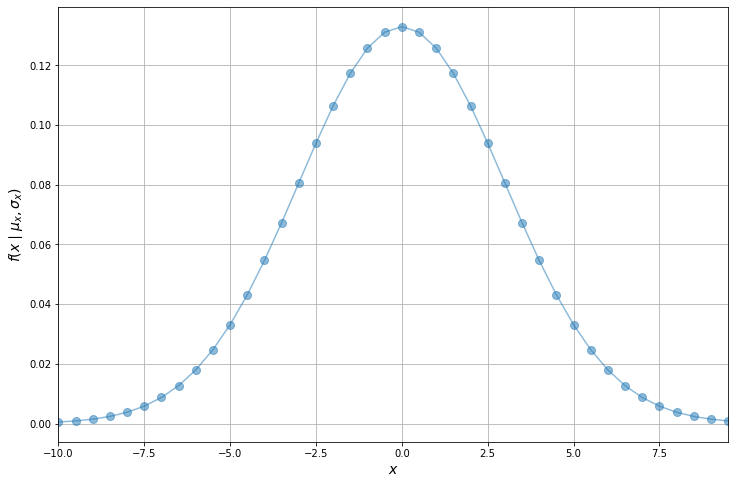

In [6]:
plot()

# Maximum Likelihood Estimation (MLE) and Maximum A Posteriori Estimation (MAP)

We wish to perform a noisy measurement over a communication channel (lecture notes page 125 as of 2020). Both the unknown $X$ (transmitted data) and the noise $W$ (interference) are modelled as gaussian random variables. We wish to estimate $\hat{X}$ from $Y$.
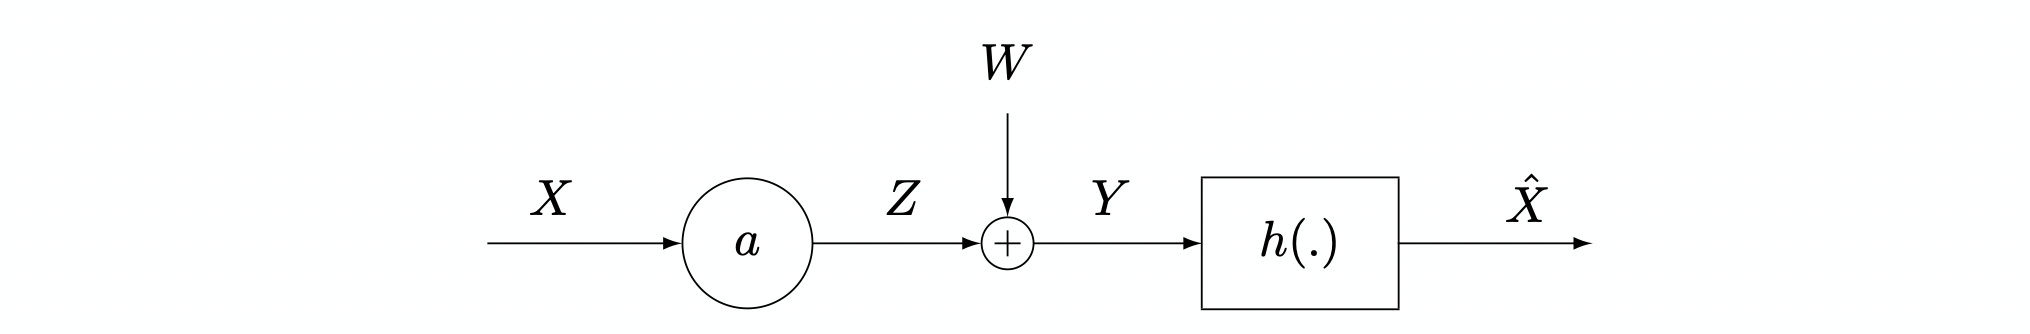

In [2]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#-------------------------------------------------------------------------------

#read in parameters
m_xG = 0
sigma_xG = 3
aG = 1
sigma_wG = 3
def update_parameters(m_x, sigma_x, sigma_w, a):
  global m_xG, sigma_xG, sigma_wG, aG
  m_xG, sigma_xG, sigma_wG, aG = m_x, sigma_x, sigma_w, a
widgets.interact(update_parameters, m_x = widgets.FloatSlider(min=-10, max=10, value=0), sigma_x = widgets.FloatSlider(min=0.1, max=10, value=3), sigma_w = widgets.FloatSlider(min=0.1, max=10, value=3), a = widgets.FloatSlider(min=0.1, max=10, value=1));

#Important Stuff
################################################################################
#X and W are both gaussian R.V.
gaussian_pdf = lambda x, m_x, sigma_x: 1/(np.sqrt(2*np.pi)*sigma_x) * np.exp(-(x-m_x)**2 / (2*sigma_x**2))

def compute_pdfs():
  fx_values = gaussian_pdf(x_values, m_xG, sigma_xG) #f(x)
  fw_values = gaussian_pdf(w_values, 0, sigma_wG) #f(w)
  fxy_values = gaussian_pdf(X, m_xG, sigma_xG) * gaussian_pdf(Y-aG*X, 0, sigma_wG) #f(y,x)
  return (fx_values, fw_values,fxy_values)
################################################################################

#range to display
x_values = np.arange(-10,10,0.5)
w_values = np.arange(-10,10,0.5)
y_values = np.arange(-10,10,0.5)
X, Y = np.meshgrid(x_values, y_values)

def illustrate():
  (fx_values, fw_values,fxy_values) = compute_pdfs()

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.grid()
  ax1.set_xlabel('$x$', fontsize=14)
  ax1.set_ylabel('$f(x \mid \mu_x, \sigma_x)$', fontsize=14)
  ax1.axis(xmin=x_values[0], xmax=x_values[-1])
  ax1.plot(x_values, fx_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 3, 2)
  ax2.grid()
  ax2.set_xlabel('$w$', fontsize=14)
  ax2.set_ylabel('$f(w \mid \sigma_W)$', fontsize=14)
  ax2.axis(xmin=w_values[0], xmax=w_values[-1])
  ax2.plot(w_values, fw_values, alpha=0.5, marker='o', markersize=8);

  ax3 = fig.add_subplot(1, 3, 3, projection='3d')
  ax3.plot_surface(X, Y, fxy_values, cmap='terrain', alpha=0.6)
  ax3.plot_wireframe(X, Y, fxy_values, color='black', alpha=0.5, linewidths=1)
  ax3.set(xlabel='$x$', ylabel='$y$')
  ax3.set_zlabel('$f(y, x)$', labelpad=10)

interactive(children=(FloatSlider(value=0.0, description='m_x', max=10.0, min=-10.0), FloatSlider(value=3.0, d…

The code cell above allows you to set parameters for the distributions of $X$ and $W$. This will affect how MLE, MAP and Bayesian MMSE estimation will estimate $X$ given $Y$. Below the pdf of $X$ and $W$ as well as the joint pdf of $X$ and $Y$ are plotted for illustration.

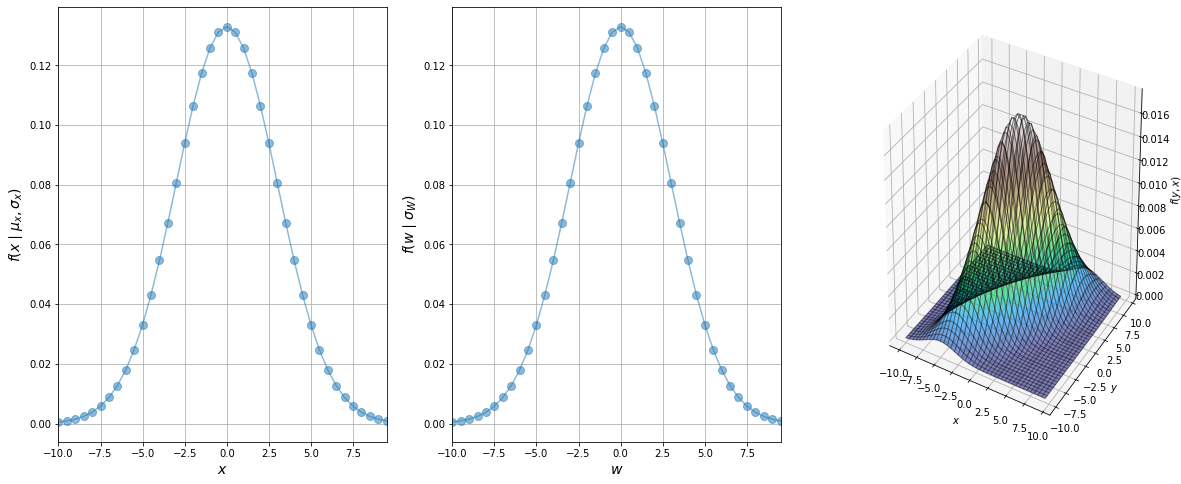

In [3]:
illustrate()

In [4]:
#read in parameter
yG = 0
def update_y(y):
  global yG
  yG = y
widgets.interact(update_y, y = widgets.FloatSlider(min=-10, max=10, value=0));

#Important Stuff
################################################################################
def compute_statistics():
  fx_y_values = gaussian_pdf(yG-aG*x_values, 0, sigma_wG) #f(y|x)
  x_hat1 = yG/aG #MSE

  fxy_values = gaussian_pdf(x_values, m_xG, sigma_xG) * gaussian_pdf(yG-aG*x_values, 0, sigma_wG) #f(y,x)
  x_hat2 = (m_xG/sigma_xG**2 + aG*yG/sigma_wG**2)/(1/sigma_xG**2 + aG**2/sigma_wG**2) #MAP

  x_hat3 = (sigma_wG**2 * m_xG + aG * sigma_xG**2 * yG)/(sigma_wG**2 + aG**2 * sigma_xG**2) #MAP

  return (fx_y_values, x_hat1, fxy_values, x_hat2, x_hat3)
################################################################################

def illustrate2():
  (fx_y_values, x_hat1, fxy_values, x_hat2, x_hat3) = compute_statistics()
  
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

  ax1.grid()
  ax1.set_xlabel('$x$ with MLE $\hat{x} =$ ' + "{:.2f}".format(x_hat1), fontsize=14)
  ax1.set_ylabel('$f(y \mid x)$', fontsize=14)
  ax1.axis(xmin=x_values[0], xmax=x_values[-1])
  ax1.plot(x_values, fx_y_values, alpha=0.5, marker='o', markersize=8);

  ax2.grid()
  ax2.set_xlabel('$x$ with MAP $\hat{x} =$ ' + "{:.2f}".format(x_hat2) + " and Bayesian MMSE Estimate $\hat{x} =$ " + "{:.2f}".format(x_hat3), fontsize=14)
  ax2.set_ylabel('$f(x \mid y)$', fontsize=14)
  ax2.axis(xmin=x_values[0], xmax=x_values[-1])
  ax2.plot(x_values, fxy_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(FloatSlider(value=0.0, description='y', max=10.0, min=-10.0), Output()), _dom_classes=('…

The code cell above allows you to set the observed value of $Y$ and compute MLE, MAP and Bayesian MMSE estimation. Below the conditional probabilities used for estimation are plotted. You can see that MLE and MAP estimation both pick out the maximum value of the pdf.

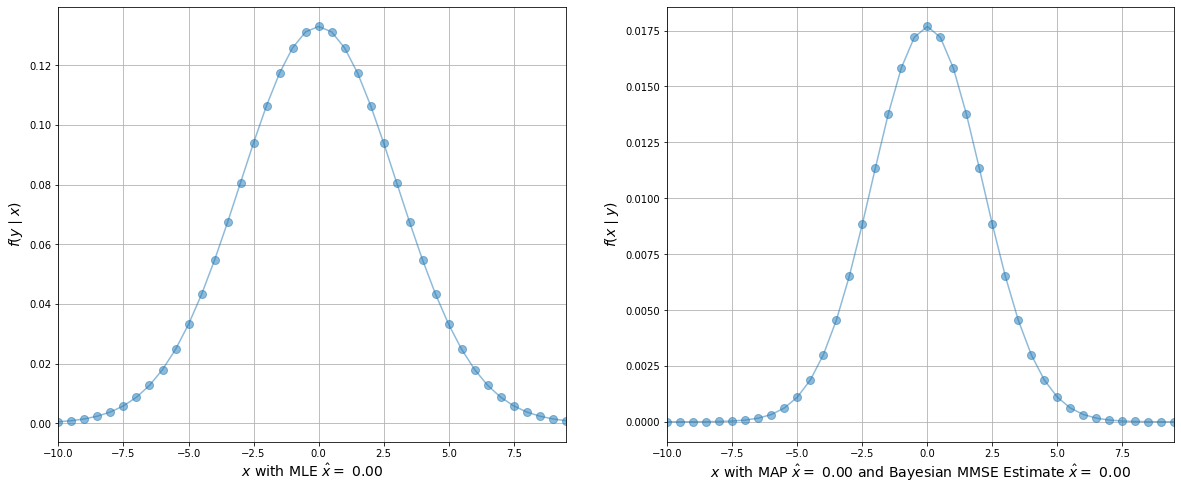

In [5]:
illustrate2()

Notice that in this case MAP Estimation coincides with MMSE Estimation. Why is that? (Hint: The graph is symmetric around the peak)